<a href="https://colab.research.google.com/github/Sanjana-sun/course-content/blob/main/Personalized_Student_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy requests scikit-learn matplotlib seaborn


In [28]:
import requests
import json

# Function to fetch and print API response for debugging
def fetch_and_debug(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print(f"Data from {url}:")
        print(json.dumps(data, indent=4))  # Pretty-print JSON response
        return data
    else:
        print(f"Failed to fetch data from {url}")
        return None

# Fetch data from both current quiz URLs
current_quiz_data_1 = fetch_and_debug("https://www.jsonkeeper.com/b/LLQT")
current_quiz_data_2 = fetch_and_debug("https://api.jsonserve.com/rJvd7g")

# Fetch historical quiz data
#historical_quiz_data = fetch_and_debug("https://api.jsonserve.com/XgAgFJ")


Streaming output truncated to the last 5000 lines.
                        "question_id": 1883,
                        "is_correct": false,
                        "created_at": "2024-07-02T15:50:57.517+05:30",
                        "updated_at": "2024-07-02T15:50:57.517+05:30",
                        "unanswered": false,
                        "photo_url": null
                    },
                    {
                        "id": 7549,
                        "description": "Liver, Pancreas, Fat bodies, Gall bladder",
                        "question_id": 1883,
                        "is_correct": false,
                        "created_at": "2024-07-02T15:50:57.521+05:30",
                        "updated_at": "2024-07-02T15:50:57.521+05:30",
                        "unanswered": false,
                        "photo_url": null
                    }
                ]
            },
            {
                "id": 1884,
                "description": "In the given diag

In [29]:
pip install requests pandas numpy matplotlib seaborn scikit-learn fpdf

In [ ]:
QUIZ_ENDPOINT = "https://jsonkeeper.com/b/LLQT"
QUIZ_SUBMISSION_ENDPOINT = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_QUIZ_ENDPOINT = "https://api.jsonserve.com/XgAgFJ"


<ipython-input-42-1fa70ab179e0>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topics, y=accuracies, palette="coolwarm")


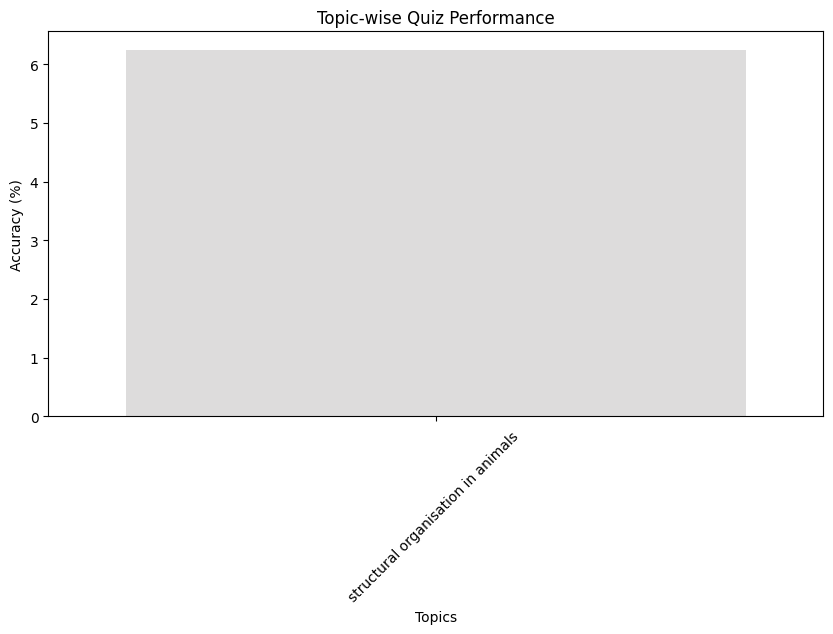

In [42]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Suppress SSL warnings
warnings.filterwarnings("ignore", message="Unverified HTTPS request")

# Constants
QUIZ_ENDPOINT = "https://jsonkeeper.com/b/LLQT"
QUIZ_SUBMISSION_ENDPOINT = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_QUIZ_ENDPOINT = "https://api.jsonserve.com/XgAgFJ"

def fetch_data(url):
    """Fetch data from API with SSL verification bypass and error handling."""
    try:
        response = requests.get(url, verify=False)  # Disable SSL verification
        if response.status_code == 200:
            logging.info(f"Data fetched successfully from {url}")
            return response.json()
        else:
            logging.error(f"Failed to fetch data from {url}. Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        logging.error(f"Error fetching data from {url}: {e}")
    return {}

def load_current_quiz_data():
    """Load current quiz and submission data."""
    quiz_data = fetch_data(QUIZ_ENDPOINT)
    submission_data = fetch_data(QUIZ_SUBMISSION_ENDPOINT)
    return quiz_data, submission_data

def load_historical_quiz_data():
    """Load historical quiz data."""
    return fetch_data(HISTORICAL_QUIZ_ENDPOINT)

def analyze_current_quiz(quiz_data, submission_data):
    """Analyze current quiz performance."""
    if not quiz_data or not submission_data:
        logging.warning("No data available for current quiz analysis.")
        return None

    topic_performance = {}
    quiz_questions = quiz_data.get('quiz', {}).get('questions', [])

    if not quiz_questions:
        logging.error("No valid quiz questions found.")
        return None

    for question in quiz_questions:
        try:
            topic = question.get('topic', 'Unknown')
            question_id = str(question.get('id', ''))
            correct_option = next((opt['id'] for opt in question.get('options', []) if opt.get('is_correct')), None)
            selected_option = submission_data.get('response_map', {}).get(question_id)

            if topic not in topic_performance:
                topic_performance[topic] = {'correct': 0, 'total': 0}

            topic_performance[topic]['total'] += 1
            if selected_option == correct_option:
                topic_performance[topic]['correct'] += 1
        except Exception as e:
            logging.warning(f"Error processing question {question_id}: {e}")

    total_correct = sum(stats['correct'] for stats in topic_performance.values())
    total_questions = sum(stats['total'] for stats in topic_performance.values())
    overall_accuracy = (total_correct / total_questions) * 100 if total_questions > 0 else 0

    return {'topic_performance': topic_performance, 'overall_accuracy': overall_accuracy}

def visualize_topic_performance(topic_performance):
    """Generate a bar chart for topic-wise accuracy."""
    if not topic_performance:
        logging.warning("No data available for visualization.")
        return

    topics = list(topic_performance.keys())
    accuracies = [(stats['correct'] / stats['total']) * 100 for stats in topic_performance.values()]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=topics, y=accuracies, palette="coolwarm")
    plt.xlabel("Topics")
    plt.ylabel("Accuracy (%)")
    plt.title("Topic-wise Quiz Performance")
    plt.xticks(rotation=45)
    plt.show()

def analyze_historical_quiz(historical_data):
    """Analyze historical quiz performance."""
    if not historical_data:
        logging.warning("No historical quiz data available.")
        return None

    difficulty_trends = {}
    for quiz in historical_data:
        try:
            difficulty = quiz.get('quiz', {}).get('difficulty_level', 'Unknown')
            correct_answers = quiz.get('correct_answers', 0)
            total_questions = quiz.get('total_questions', 1)  # Avoid division by zero

            if difficulty not in difficulty_trends:
                difficulty_trends[difficulty] = {'correct': 0, 'total': 0}

            difficulty_trends[difficulty]['correct'] += correct_answers
            difficulty_trends[difficulty]['total'] += total_questions
        except Exception as e:
            logging.warning(f"Error processing historical quiz: {e}")

    return {difficulty: (stats['correct'] / stats['total']) * 100 for difficulty, stats in difficulty_trends.items()}

def define_persona(current_analysis):
    """Define student persona based on accuracy."""
    if not current_analysis:
        return "Unknown"
    accuracy = current_analysis.get('overall_accuracy', 0)
    return "High Achiever" if accuracy > 80 else "Average Performer" if accuracy > 50 else "Needs Improvement"

def generate_recommendations(current_analysis, historical_analysis):
    """Generate study recommendations."""
    recommendations = []
    if not current_analysis or not historical_analysis:
        return recommendations

    for topic, stats in current_analysis['topic_performance'].items():
        if (stats['correct'] / stats['total']) * 100 < 50:
            recommendations.append(f"Focus on {topic} (Accuracy: {stats['correct'] / stats['total']:.2%})")

    for difficulty, accuracy in historical_analysis.items():
        if accuracy < 50:
            recommendations.append(f"Practice more {difficulty} level questions.")

    return recommendations

def predict_neet_rank(historical_data):
    """Predict NEET rank based on historical quiz performance."""
    if not historical_data:
        logging.warning("No historical data available for NEET rank prediction.")
        return None

    # Collect features for prediction (correct answers, total questions, difficulty)
    X = []
    y = []

    for quiz in historical_data:
        try:
            difficulty = quiz.get('quiz', {}).get('difficulty_level', 'Unknown')
            correct_answers = quiz.get('correct_answers', 0)
            total_questions = quiz.get('total_questions', 1)
            difficulty_level = 1 if difficulty == "Easy" else 2 if difficulty == "Medium" else 3

            X.append([correct_answers, total_questions, difficulty_level])
            y.append(total_questions - correct_answers)
        except Exception as e:
            logging.warning(f"Error processing historical data for NEET rank prediction: {e}")

    if len(X) == 0:
        return None

    # Train a RandomForest model for better accuracy prediction
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X, y)
    predicted_rank = model.predict([[sum(quiz.get('correct_answers', 0) for quiz in historical_data), len(historical_data), 2]])  # Using median difficulty
    return predicted_rank[0]

if __name__ == "__main__":
    quiz_data, submission_data = load_current_quiz_data()
    historical_data = load_historical_quiz_data()

    current_analysis = analyze_current_quiz(quiz_data, submission_data)
    historical_analysis = analyze_historical_quiz(historical_data)

    if current_analysis:
        visualize_topic_performance(current_analysis['topic_performance'])

    persona = define_persona(current_analysis)
    recommendations = generate_recommendations(current_analysis, historical_analysis)

    logging.info(f"Student Persona: {persona}")
    logging.info("Recommendations:")
    for rec in recommendations:
        logging.info(f"- {rec}")

    predicted_rank = predict_neet_rank(historical_data)
    if predicted_rank:
        logging.info(f"Predicted NEET Rank: {predicted_rank}")

    logging.info("Analysis completed successfully!")
